
# CP1 Data Story

Directions:

Ask the following questions and look for the answers using code and plots:
Can you count something interesting?
Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
Can you make a bar plot or a histogram?
Can you compare two related quantities?
Can you make a scatterplot?
Can you make a time-series plot?

Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import csv

While I'm still figuring out how to reindex my dataframe, I'm curious about a few things:
     - Which days of the week do most Level 1 tweets break?
     - What time of day?
     - How would the above questions compare in-season to out-of-season?
     - If I could relabel L1 particular tweets as 'injury related' or 'transactional', how then would L1 tweets be dispersed throughout the day/week/year? 

In [17]:
# load Adam Schefter's tweets from May 2018 through April 2019
tweets = pd.read_csv('schefter_tweets_April.csv')

In [18]:
tweets.head()

tweet_ID            timestamp  priority  \
0  1114891664961699842  2019-04-07 14:04:21         6   
1  1114890687286317056  2019-04-07 14:00:28         6   
2  1114888355194507269  2019-04-07 13:51:12         6   
3  1114878641115148288  2019-04-07 13:12:36         6   
4  1114718902238482432  2019-04-07 02:37:51         6   

                                                text  
0  b'RT @MikeReiss: Quick-hit thoughts/notes arou...  
1  b'RT @JordanRaanan: A "1 percent chance" trade...  
2  b'Michigan LB Devin Bush is visiting the Giant...  
3  b'Texas Tech has produced one NFL MVP (Patrick...  
4  b'RT @MasterTes: An Auburn fan next to me pour...

In [19]:
tweets['priority'].value_counts()

6    2537
1     382
3     254
5     253
4     233
2     188
Name: priority, dtype: int64

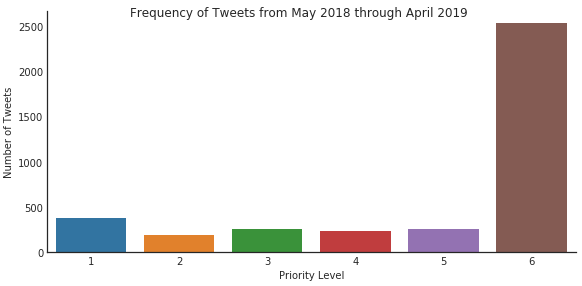

In [37]:
with sns.axes_style('white'):
    g = sns.factorplot("priority", data=tweets, aspect=2, kind="count")
    g.set_ylabels('Number of Tweets')
    g.set_xlabels('Priority Level')
    g.fig.suptitle("Frequency of Tweets from May 2018 through April 2019")

In [38]:
index = pd.DatetimeIndex(tweets['timestamp'])

In [40]:
index

DatetimeIndex(['2019-04-07 14:04:21', '2019-04-07 14:00:28',
               '2019-04-07 13:51:12', '2019-04-07 13:12:36',
               '2019-04-07 02:37:51', '2019-04-06 19:43:03',
               '2019-04-06 17:06:07', '2019-04-06 15:24:12',
               '2019-04-06 14:29:59', '2019-04-06 13:54:48',
               ...
               '2018-05-22 16:06:13', '2018-05-22 11:38:57',
               '2018-05-22 09:42:47', '2018-05-21 22:48:21',
               '2018-05-21 22:25:36', '2018-05-21 20:31:55',
               '2018-05-21 18:10:31', '2018-05-21 17:51:15',
               '2018-05-21 17:36:33', '2018-05-21 17:30:20'],
              dtype='datetime64[ns]', name='timestamp', length=3847, freq=None)

In [41]:
tweets = pd.DataFrame(tweets, index=index)

In [42]:
tweets


tweet_ID timestamp  priority text
timestamp                                            
2019-04-07 14:04:21      NaN       NaN       NaN  NaN
2019-04-07 14:00:28      NaN       NaN       NaN  NaN
2019-04-07 13:51:12      NaN       NaN       NaN  NaN
2019-04-07 13:12:36      NaN       NaN       NaN  NaN
2019-04-07 02:37:51      NaN       NaN       NaN  NaN
2019-04-06 19:43:03      NaN       NaN       NaN  NaN
2019-04-06 17:06:07      NaN       NaN       NaN  NaN
2019-04-06 15:24:12      NaN       NaN       NaN  NaN
2019-04-06 14:29:59      NaN       NaN       NaN  NaN
2019-04-06 13:54:48      NaN       NaN       NaN  NaN
2019-04-05 23:44:40      NaN       NaN       NaN  NaN
2019-04-05 23:42:23      NaN       NaN       NaN  NaN
2019-04-05 23:12:33      NaN       NaN       NaN  NaN
2019-04-05 23:12:32      NaN       NaN       NaN  NaN
2019-04-05 22:03:41      NaN       NaN       NaN  NaN
2019-04-05 21:55:07      NaN       NaN       NaN  NaN
2019-04-05 19:11:13      NaN       NaN       NaN  NaN
2019-04-05 18:50:54      NaN       NaN       NaN  NaN
2019-04-05 15:01:14      NaN       NaN       NaN  NaN
2019-04-05 15:00:47      NaN       NaN       NaN  NaN
2019-04-05 13:40:06      NaN       NaN       NaN  NaN
2019-04-05 11:51:54      NaN       NaN       NaN  NaN
2019-04-05 02:51:37      NaN       NaN       NaN  NaN
2019-04-05 01:19:05      NaN       NaN       NaN  NaN
2019-04-05 01:13:27      NaN       NaN       NaN  NaN
2019-04-05 00:16:48      NaN       NaN       NaN  NaN
2019-04-05 00:13:36      NaN       NaN       NaN  NaN
2019-04-04 23:30:53      NaN       NaN       NaN  NaN
2019-04-04 21:16:41      NaN       NaN       NaN  NaN
2019-04-04 20:42:08      NaN       NaN       NaN  NaN
...                      ...       ...       ...  ...
2018-05-23 20:30:10      NaN       NaN       NaN  NaN
2018-05-23 16:16:22      NaN       NaN       NaN  NaN
2018-05-23 16:12:53      NaN       NaN       NaN  NaN
2018-05-23 14:55:54      NaN       NaN       NaN  NaN
2018-05-23 14:52:30      NaN       NaN       NaN  NaN
2018-05-23 14:10:05      NaN       NaN       NaN  NaN
2018-05-23 13:00:00      NaN       NaN       NaN  NaN
2018-05-23 12:35:47      NaN       NaN       NaN  NaN
2018-05-23 11:21:02      NaN       NaN       NaN  NaN
2018-05-23 01:47:42      NaN       NaN       NaN  NaN
2018-05-23 01:43:53      NaN       NaN       NaN  NaN
2018-05-23 01:41:08      NaN       NaN       NaN  NaN
2018-05-22 22:35:19      NaN       NaN       NaN  NaN
2018-05-22 20:59:50      NaN       NaN       NaN  NaN
2018-05-22 20:38:50      NaN       NaN       NaN  NaN
2018-05-22 20:27:28      NaN       NaN       NaN  NaN
2018-05-22 20:13:20      NaN       NaN       NaN  NaN
2018-05-22 19:40:04      NaN       NaN       NaN  NaN
2018-05-22 19:37:19      NaN       NaN       NaN  NaN
2018-05-22 16:08:43      NaN       NaN       NaN  NaN
2018-05-22 16:06:13      NaN       NaN       NaN  NaN
2018-05-22 11:38:57      NaN       NaN       NaN  NaN
2018-05-22 09:42:47      NaN       NaN       NaN  NaN
2018-05-21 22:48:21      NaN       NaN       NaN  NaN
2018-05-21 22:25:36      NaN       NaN       NaN  NaN
2018-05-21 20:31:55      NaN       NaN       NaN  NaN
2018-05-21 18:10:31      NaN       NaN       NaN  NaN
2018-05-21 17:51:15      NaN       NaN       NaN  NaN
2018-05-21 17:36:33      NaN       NaN       NaN  NaN
2018-05-21 17:30:20      NaN       NaN       NaN  NaN

[3847 rows x 4 columns]